#Predicting Stock Prices: Develop a time series prediction model to
# forecast stock prices.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm
from sklearn.metrics import r2_score,mean_squared_error
import pickle


In [6]:
df=pd.read_csv('/content/drive/MyDrive/stock_price_timeseries_dataset.csv')
df

,Date,Stock,Open,High,Low,Close,Volume
0,2020-01-01,AAPL,173.80,174.75,173.68,174.43,8204212
1,2020-01-02,AAPL,176.01,177.59,174.07,177.55,2766891
2,2020-01-03,AAPL,177.57,178.37,176.62,176.71,5721339
3,2020-01-06,AAPL,176.01,177.58,171.33,171.73,9242680
4,2020-01-07,AAPL,171.85,172.20,170.69,170.82,4416664
...,...,...,...,...,...,...,...
6520,2024-12-25,TSLA,225.09,225.21,221.66,223.18,9701165
6521,2024-12-26,TSLA,222.07,222.87,220.31,220.32,6045143
6522,2024-12-27,TSLA,219.94,221.69,218.38,219.57,8512677
6523,2024-12-30,TSLA,219.54,220.33,216.70,217.33,9137479


In [7]:
df_stock=df[df['Stock']=='AAPL']
df_stock.head()

,Date,Stock,Open,High,Low,Close,Volume
0,2020-01-01,AAPL,173.80,174.75,173.68,174.43,8204212
1,2020-01-02,AAPL,176.01,177.59,174.07,177.55,2766891
2,2020-01-03,AAPL,177.57,178.37,176.62,176.71,5721339
3,2020-01-06,AAPL,176.01,177.58,171.33,171.73,9242680
4,2020-01-07,AAPL,171.85,172.20,170.69,170.82,4416664


In [8]:
df_stock['Date']=pd.to_datetime(df_stock['Date'])
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 0 to 1304
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1305 non-null   datetime64[ns]
 1   Stock   1305 non-null   object        
 2   Open    1305 non-null   float64       
 3   High    1305 non-null   float64       
 4   Low     1305 non-null   float64       
 5   Close   1305 non-null   float64       
 6   Volume  1305 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 113.9+ KB


/tmp/ipython-input-31740583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['Date']=pd.to_datetime(df_stock['Date'])


In [9]:
df_stock['Days']=(df_stock['Date']-df_stock['Date'].min())
df_stock

/tmp/ipython-input-1482232864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock['Days']=(df_stock['Date']-df_stock['Date'].min())


,Date,Stock,Open,High,Low,Close,Volume,Days
0,2020-01-01,AAPL,173.80,174.75,173.68,174.43,8204212,0 days
1,2020-01-02,AAPL,176.01,177.59,174.07,177.55,2766891,1 days
2,2020-01-03,AAPL,177.57,178.37,176.62,176.71,5721339,2 days
3,2020-01-06,AAPL,176.01,177.58,171.33,171.73,9242680,5 days
4,2020-01-07,AAPL,171.85,172.20,170.69,170.82,4416664,6 days
...,...,...,...,...,...,...,...,...
1300,2024-12-25,AAPL,207.96,210.35,206.18,208.42,4510463,1820 days
1301,2024-12-26,AAPL,208.69,214.63,207.23,213.99,4335705,1821 days
1302,2024-12-27,AAPL,213.99,217.12,212.77,216.24,2601207,1822 days
1303,2024-12-30,AAPL,216.62,217.17,213.72,215.53,7203690,1825 days


In [10]:
x=df_stock['Days']
y=df_stock['Close']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)

In [12]:
model=lm.LinearRegression()
model.fit(x_train.values.reshape(-1,1),y_train)
with open('model_pickle','wb') as f:
  pickle.dump(model,f)

In [13]:
y_pred=model.predict(x_test.dt.days.values.reshape(-1,1))
y_pred

array([185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28983821,
       185.28983821, 185.28983821, 185.28983821, 185.28

In [17]:
mse=mean_squared_error(y_test,y_pred)
mse

466.3177306887345

In [18]:
r2=r2_score(y_test,y_pred)
r2


-0.853809574619099

Text(0, 0.5, 'Predicted')

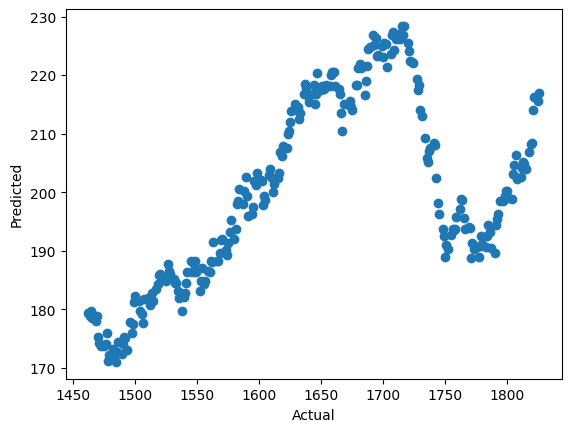

In [15]:
plt.scatter(x_test.dt.days,y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')